## Importing Importent Packages and libraries

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer


## Read the Data set

In [3]:
df=pd.read_csv('Tweets.csv')
df.shape
df.head(600)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,570260118043914240,negative,1.0000,Customer Service Issue,1.0000,United,NaN,throthra,NaN,0,@united why am I to believe they will help whe...,NaN,2015-02-24 08:33:01 -0800,NaN,NaN
596,570259691579809792,negative,0.6957,Lost Luggage,0.6957,United,NaN,jakepoznak,NaN,0,@united they helped me at the baggage service ...,NaN,2015-02-24 08:31:20 -0800,NaN,Eastern Time (US & Canada)
597,570259632557395968,negative,0.6281,Customer Service Issue,0.3391,United,NaN,AldenGlobe,NaN,0,@united Mobile boarding pass disappeared from ...,NaN,2015-02-24 08:31:05 -0800,"Steamboat Springs, CO",Mountain Time (US & Canada)
598,570259311315836928,positive,1.0000,NaN,NaN,United,NaN,cehertz,NaN,0,@united for the record- Rozana at Newark was l...,NaN,2015-02-24 08:29:49 -0800,btv,NaN


## Chacking total missing values in the data set

In [4]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

## Heatmap of null values

<Axes: >

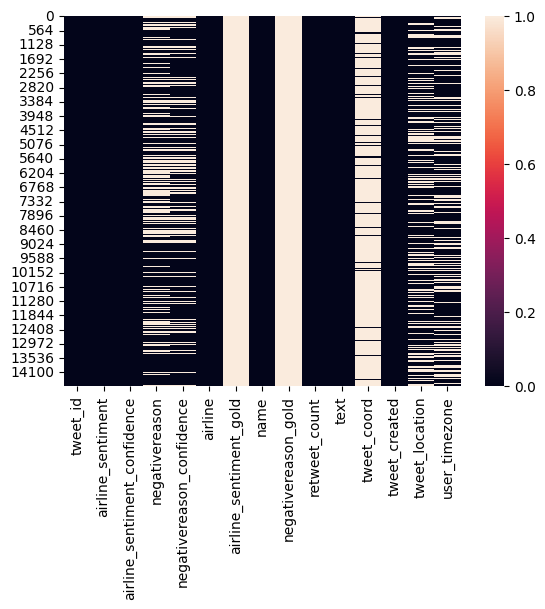

In [5]:
sns.heatmap(df.isnull())

## Sentiment graph for the reactions

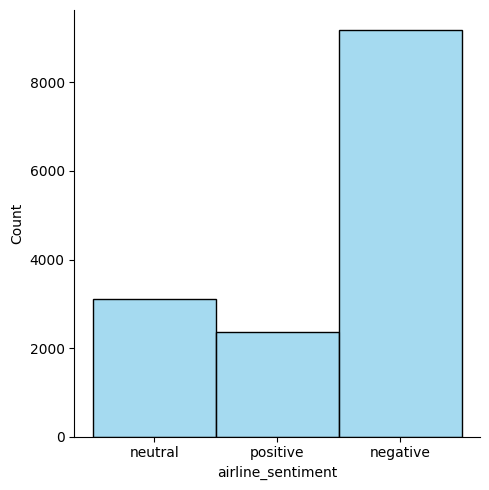

In [6]:
sns.displot(df['airline_sentiment'],color='skyblue')

## Handling The missing Values of clean the data set
### 1-mode imputation on negativereason

In [7]:
mode=df[df['negativereason'].notna()]['negativereason'].mode()[0]
df['negativereason']=df['negativereason'].fillna(mode)

### 2-Median imputation on negativereason_confidence

In [8]:
df['negativereason_confidence']=df['negativereason_confidence'].fillna(df['negativereason_confidence'].median())

### 3-Mode imputation on airline_sentiment_gold

In [9]:
mode1=df[df['airline_sentiment_gold'].notna()]['airline_sentiment_gold'].mode()[0]
df['airline_sentiment_gold']=df['airline_sentiment_gold'].fillna(mode1)

### 4-Mode imputation on negativereason_gold

In [10]:
mode2=df[df['negativereason_gold'].notna()]['negativereason_gold'].mode()[0]
df['negativereason_gold']=df['negativereason_gold'].fillna(mode2)


### 5-Mode imputation on tweet_coord

In [11]:
mode3=df[df['tweet_coord'].notna()]['tweet_coord'].mode()[0]
df['tweet_coord']=df['tweet_coord'].fillna(mode3)

### 6-Mode imputation on tweet_location

In [12]:
mode4=df[df['tweet_location'].notna()]['tweet_location'].mode()[0]
df['tweet_location']=df['tweet_location'].fillna(mode4)

### 7-Mode imputation on user_timezone

In [13]:
mode5=df[df['user_timezone'].notna()]['user_timezone'].mode()[0]
df['user_timezone']=df['user_timezone'].fillna(mode5)


In [14]:
df.head(100)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,Customer Service Issue,0.6706,Virgin America,negative,cairdin,Customer Service Issue,0,@VirginAmerica What @dhepburn said.,"[0.0, 0.0]",2015-02-24 11:35:52 -0800,"Boston, MA",Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,Customer Service Issue,0.0000,Virgin America,negative,jnardino,Customer Service Issue,0,@VirginAmerica plus you've added commercials t...,"[0.0, 0.0]",2015-02-24 11:15:59 -0800,"Boston, MA",Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,Customer Service Issue,0.6706,Virgin America,negative,yvonnalynn,Customer Service Issue,0,@VirginAmerica I didn't today... Must mean I n...,"[0.0, 0.0]",2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,negative,jnardino,Customer Service Issue,0,@VirginAmerica it's really aggressive to blast...,"[0.0, 0.0]",2015-02-24 11:15:36 -0800,"Boston, MA",Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,negative,jnardino,Customer Service Issue,0,@VirginAmerica and it's a really big bad thing...,"[0.0, 0.0]",2015-02-24 11:14:45 -0800,"Boston, MA",Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,569910981868060673,negative,1.0000,Customer Service Issue,0.6863,Virgin America,negative,MerchEngines,Customer Service Issue,0,"@VirginAmerica Is it me, or is your website do...","[0.0, 0.0]",2015-02-23 09:25:41 -0800,"Los Angeles, CA",Arizona
96,569909224521641984,negative,1.0000,Customer Service Issue,0.6771,Virgin America,negative,ColorCartel,Customer Service Issue,0,@VirginAmerica I can't check in or add a bag. ...,"[0.0, 0.0]",2015-02-23 09:18:42 -0800,"Austin, TX",Mountain Time (US & Canada)
97,569907336485019648,negative,1.0000,Can't Tell,0.6590,Virgin America,negative,MustBeSpoken,Customer Service Issue,0,@VirginAmerica - Let 2 scanned in passengers l...,"[0.0, 0.0]",2015-02-23 09:11:12 -0800,"Boston, MA",Eastern Time (US & Canada)
98,569896805611089920,negative,1.0000,Flight Booking Problems,0.6714,Virgin America,negative,mattbunk,Customer Service Issue,0,@virginamerica What is your phone number. I ca...,"[0.0, 0.0]",2015-02-23 08:29:21 -0800,"Sterling Heights, MI",Eastern Time (US & Canada)


## After handling the missing values here is the clean data

In [15]:
df.isnull().sum()

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
airline_sentiment_gold          0
name                            0
negativereason_gold             0
retweet_count                   0
text                            0
tweet_coord                     0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64

## Again checking the heat map after cleaning

<Axes: >

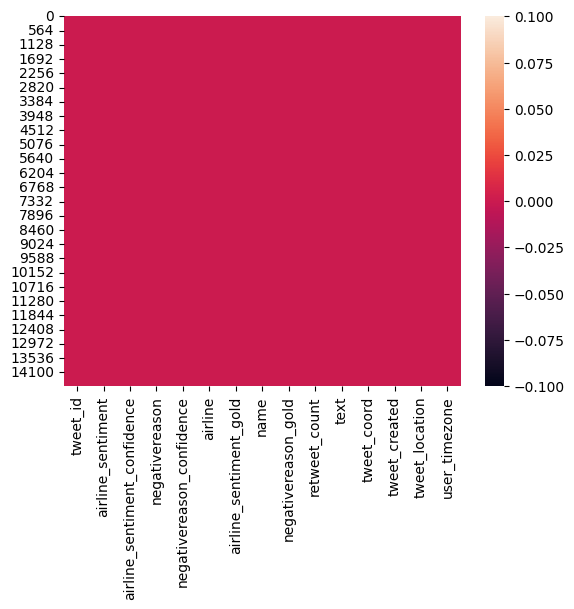

In [16]:
sns.heatmap(df.isnull())

## Replace the reactions with numerical values for better under standing

In [17]:
df.replace({'airline_sentiment':{'positive':1}},inplace=True)
df.replace({'airline_sentiment':{'negative':0}},inplace=True)
df.replace({'airline_sentiment':{'neutral':2}},inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_55332\3761489794.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'airline_sentiment':{'neutral':2}},inplace=True)


## Counting the total airline_sentiment values

In [18]:
df['airline_sentiment'].value_counts()

airline_sentiment
0    9178
2    3099
1    2363
Name: count, dtype: int64

## Sentiment matrix after data cleaning

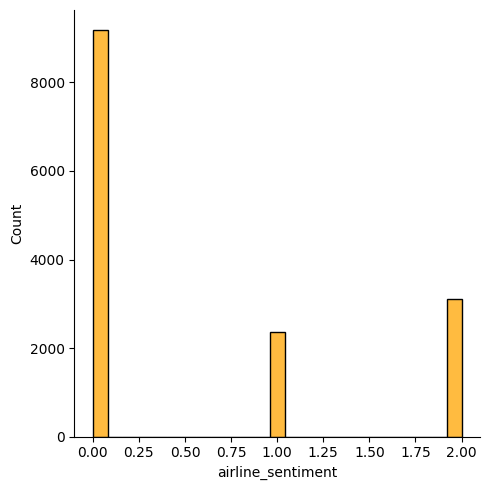

In [48]:
sns.displot(df['airline_sentiment'],color='orange')

## Download the only stopwords module 

In [20]:
#import nltk
#nltk.download('stopwords')

## Daily uses commands 

In [21]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Creating a function for clean the unnecessary comands from the Text content

In [22]:
port_stem=PorterStemmer()

### Stemming the Text content

In [23]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)

    return stemmed_content

In [24]:
df['stemmed_content'] = df['text'].apply(stemming)

In [25]:
print(df['stemmed_content'])

0                              virginamerica dhepburn said
1               virginamerica plu ad commerci experi tacki
2        virginamerica today must mean need take anoth ...
3        virginamerica realli aggress blast obnoxi ente...
4                       virginamerica realli big bad thing
                               ...                        
14635          americanair thank got differ flight chicago
14636    americanair leav minut late flight warn commun...
14637    americanair pleas bring american airlin blackb...
14638    americanair money chang flight answer phone su...
14639    americanair ppl need know mani seat next fligh...
Name: stemmed_content, Length: 14640, dtype: object


In [26]:
x=df['stemmed_content'].values
y=df['airline_sentiment'].values

### Split Train Test Data

In [27]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=2)

In [28]:
print(x.shape, x_train.shape, x_test.shape)

(14640,) (11712,) (2928,)


In [29]:
print(x_train)

['usairway thank call cheapoairchat'
 'unit tonight made fred flintston happi upgrad st class http co gkgkzlawpr'
 'southwestair thank' ...
 'southwestair bernhardtjh eventu get flight cancel flightl decid drive gave hold process refund'
 'unit fli home event tomorrow push back flight ticket get home time'
 'jetblu flight den jfk alreadi hr delay idea might chang due weather forecast etc']


In [30]:
print(x_test)

['jetblu thank'
 'usairway go flight phl phx min estim departur nobodi board updat'
 'americanair ye thank found see gray tab first' ...
 'southwestair make flight fund forfeit show tri book anoth flight use fund'
 'usairway cancel flightl want put us hotel night guess'
 'unit someon miss connect flight airlin last flight day fix']


## Coverting the text content data to numerical values for the ML understanding purpose

In [31]:
vectorizer=TfidfVectorizer()
x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

In [32]:
print(x_train)

  (0, 8637)	0.22992452432052907
  (0, 8052)	0.28304283148067094
  (0, 1113)	0.3590926953795947
  (0, 1309)	0.8591122771724313
  (1, 8533)	0.10351833510645304
  (1, 8244)	0.2465748104150846
  (1, 4878)	0.23375251504991643
  (1, 3022)	0.4312387234171083
  (1, 2888)	0.4312387234171083
  (1, 3485)	0.2673820998026499
  (1, 8608)	0.2514283355271054
  (1, 7639)	0.2591619017432782
  (1, 1413)	0.25470107574933204
  (1, 3767)	0.15691016432553495
  (1, 1473)	0.15676844381956842
  (1, 3251)	0.4312387234171083
  (2, 8052)	0.7531596019654002
  (2, 7554)	0.657837832575263
  (3, 8637)	0.1078382194962762
  (3, 6653)	0.20219206696348388
  (3, 5109)	0.5803158125733098
  (3, 3982)	0.33194135557355814
  (3, 8750)	0.3860512036413784
  (3, 5372)	0.2467855912291179
  (3, 2428)	0.2664574353092668
  :	:
  (11710, 8533)	0.12973162279979444
  (11710, 8168)	0.20885632263385995
  (11710, 3199)	0.18151613983423928
  (11710, 3669)	0.5512837247028779
  (11710, 2867)	0.1291972675716506
  (11710, 8149)	0.261306734098645

In [33]:
print(x_test)

  (0, 4213)	0.6693433715773979
  (0, 8052)	0.7429531956492289
  (1, 856)	0.26010990785242155
  (1, 1977)	0.3243337457566032
  (1, 2547)	0.4288852965932391
  (1, 2867)	0.12583203549904193
  (1, 3278)	0.22719015826048367
  (1, 5139)	0.253770168363529
  (1, 5543)	0.4245307673163359
  (1, 6137)	0.3186682476618947
  (1, 6150)	0.3491127866237835
  (1, 8604)	0.2964109896307781
  (1, 8637)	0.140870348274204
  (2, 268)	0.14779502235025627
  (2, 2828)	0.28152407376865757
  (2, 2993)	0.35235722877936454
  (2, 3363)	0.5490176734099672
  (2, 7191)	0.28281084567946607
  (2, 7925)	0.5260098763131569
  (2, 8052)	0.18087917137715182
  (2, 9275)	0.28972256697851
  (3, 771)	0.2519179622387721
  (3, 1131)	0.1478539352952149
  (3, 1840)	0.2441404612080607
  (3, 1949)	0.14973859015083812
  :	:
  (2925, 2973)	0.40674028704777815
  (2925, 3099)	0.7000225294821674
  (2925, 4898)	0.20185668385285846
  (2925, 7322)	0.25504616096698274
  (2925, 7554)	0.12607681505119533
  (2925, 8320)	0.1913853795040697
  (2925, 

## Model train using Logistic Regression CV

In [34]:
model = LogisticRegressionCV(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegressionCV(max_iter=1000)

In [35]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)

## Score the Train and Test Data Accuracy

In [36]:
print('Accuracy Score of Train Data:',training_data_accuracy)

Accuracy Score of Train Data: 0.9111168032786885


In [37]:
x_test_prediction = model.predict(x_test)
testing_data_accuracy = accuracy_score(y_test, x_test_prediction)

In [38]:
print('Accuracy Score of Test Data:',testing_data_accuracy)

Accuracy Score of Test Data: 0.7800546448087432


### Creating a sav file for read and write

In [39]:
import pickle
filename='trained_model.sav'
pickle.dump(model,open(filename, 'wb'))

In [40]:
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [41]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,stemmed_content
0,570306133677760513,2,1.0000,Customer Service Issue,0.6706,Virgin America,negative,cairdin,Customer Service Issue,0,@VirginAmerica What @dhepburn said.,"[0.0, 0.0]",2015-02-24 11:35:52 -0800,"Boston, MA",Eastern Time (US & Canada),virginamerica dhepburn said
1,570301130888122368,1,0.3486,Customer Service Issue,0.0000,Virgin America,negative,jnardino,Customer Service Issue,0,@VirginAmerica plus you've added commercials t...,"[0.0, 0.0]",2015-02-24 11:15:59 -0800,"Boston, MA",Pacific Time (US & Canada),virginamerica plu ad commerci experi tacki
2,570301083672813571,2,0.6837,Customer Service Issue,0.6706,Virgin America,negative,yvonnalynn,Customer Service Issue,0,@VirginAmerica I didn't today... Must mean I n...,"[0.0, 0.0]",2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica today must mean need take anoth ...
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,negative,jnardino,Customer Service Issue,0,@VirginAmerica it's really aggressive to blast...,"[0.0, 0.0]",2015-02-24 11:15:36 -0800,"Boston, MA",Pacific Time (US & Canada),virginamerica realli aggress blast obnoxi ente...
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,negative,jnardino,Customer Service Issue,0,@VirginAmerica and it's a really big bad thing...,"[0.0, 0.0]",2015-02-24 11:14:45 -0800,"Boston, MA",Pacific Time (US & Canada),virginamerica realli big bad thing


### Checking the prediction is right or wrong

In [42]:
x_new = x_test[569]
print(y_test[569])
prediction=model.predict(x_new)
print(prediction)

if (prediction[0]==1):
    print('positive tweet')
elif(prediction[0]==0):
    print('negative tweet')
else:
    print('neutral tweet')

0
[0]
negative tweet


In [43]:
x_new = x_test[3]
print(y_test[3])
prediction=model.predict(x_new)
print(prediction)

if (prediction[0]==1):
    print('positive tweet')
elif(prediction[0]==0):
    print('negative tweet')
else:
    print('neutral tweet')

1
[1]
positive tweet


# Done That Prediction